In [1]:
import json
import pandas as pd
from evals import compare_manual_vs_automatic_scores_with_viz, evaluate_f1_between_manual_and_automatic

In [25]:
manual_df = pd.read_csv("data/manual_curations_subset.csv")
manual_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                165 non-null    int64  
 1   publication               165 non-null    object 
 2   pmid                      165 non-null    float64
 3   id                        162 non-null    object 
 4   gene                      165 non-null    object 
 5   inheritance               164 non-null    object 
 6   evidence_type             165 non-null    object 
 7   phenotype_quality         165 non-null    object 
 8   phenotyping_method_notes  164 non-null    object 
 9   genomic_variants          60 non-null     object 
 10  coding_variants           81 non-null     object 
 11  protein_variants          79 non-null     object 
 12  score_justification       165 non-null    object 
 13  score_range               162 non-null    object 
 14  initial_sc

In [3]:
manual_df.sample(3)

,Unnamed: 0,publication,pmid,id,gene,inheritance,evidence_type,phenotype_quality,phenotyping_method_notes,genomic_variants,coding_variants,protein_variants,score_justification,score_range,initial_score,final_score
91,152,Paprocka J et al. (2021): Case Report: Lennox-...,34912368.0,Single case report,SHANK1,: de novo (mosaic variant detected in 21% of a...,Mosaic,Low Confidence in Phenotype,ASD: The clinical description of the case incl...,NaN,NaN,NaN,Default score downgraded for phenotypic eviden...,NaN,0.0,0.25
1,10,Hofer NT et al. (2020): Biophysical classifica...,31921405.0,Single case reported in the current study (Thi...,CACNA1D,: de novo,Variant is de novomissense,Low Confidence in Phenotype,ASD: Although both twin borthers were diagnose...,g.41203521C>A,c.894C>A,p.C298*,Default score upgraded after modification for ...,0-1,0.0,0.75
22,44,Tang L et al. (2021): Prospective and detailed...,33993884.0,DDX11,DDX3X,: de novo,Variant is de novomissense,High confidence in phenotype,"ASD: The study performed a prospective, detail...",g.41203500C>A,c.873C>A,p.Y291*,Default score downgraded for genotypic evidenc...,0-1,0.0,0.25


In [18]:
with open("data/extracted_cases_finetune.json") as f:
    eagle_ai_extractions = json.loads(f.read())


ENHANCED SCORE VERIFICATION SUMMARY
(Gene matching REQUIRED - only cases with matching genes are included)
(NOT SCORED cases are excluded entirely from comparison)
Total cases processed: 92
Publications with matches: 92
Cases with matches: 92
Exact score matches: 67
Overall matching rate: 100.0%
Exact match rate (of matched): 72.8%

Publication Match Types:
  - TITLE_AUTHOR_HIGH: 88
  - TITLE_HIGH: 4

Score Match Types:
  - EXACT_MATCH: 67
  - SIGNIFICANT_DIFFERENCE: 13
  - CLOSE_MATCH: 12

Score Differences:
  - Average absolute difference: 0.171
  - Median absolute difference: 0.000
  - Standard deviation: 0.357
  - Min/Max difference: 0.000 / 1.650

Case Matching Confidence:
  - Average confidence: 0.693
  - High confidence (≥0.8): 33
  - Medium confidence (≥0.5): 92
  - Low confidence (<0.5): 0


CREATING SCORE COMPARISON VISUALIZATIONS
Creating comprehensive score comparison visualizations...


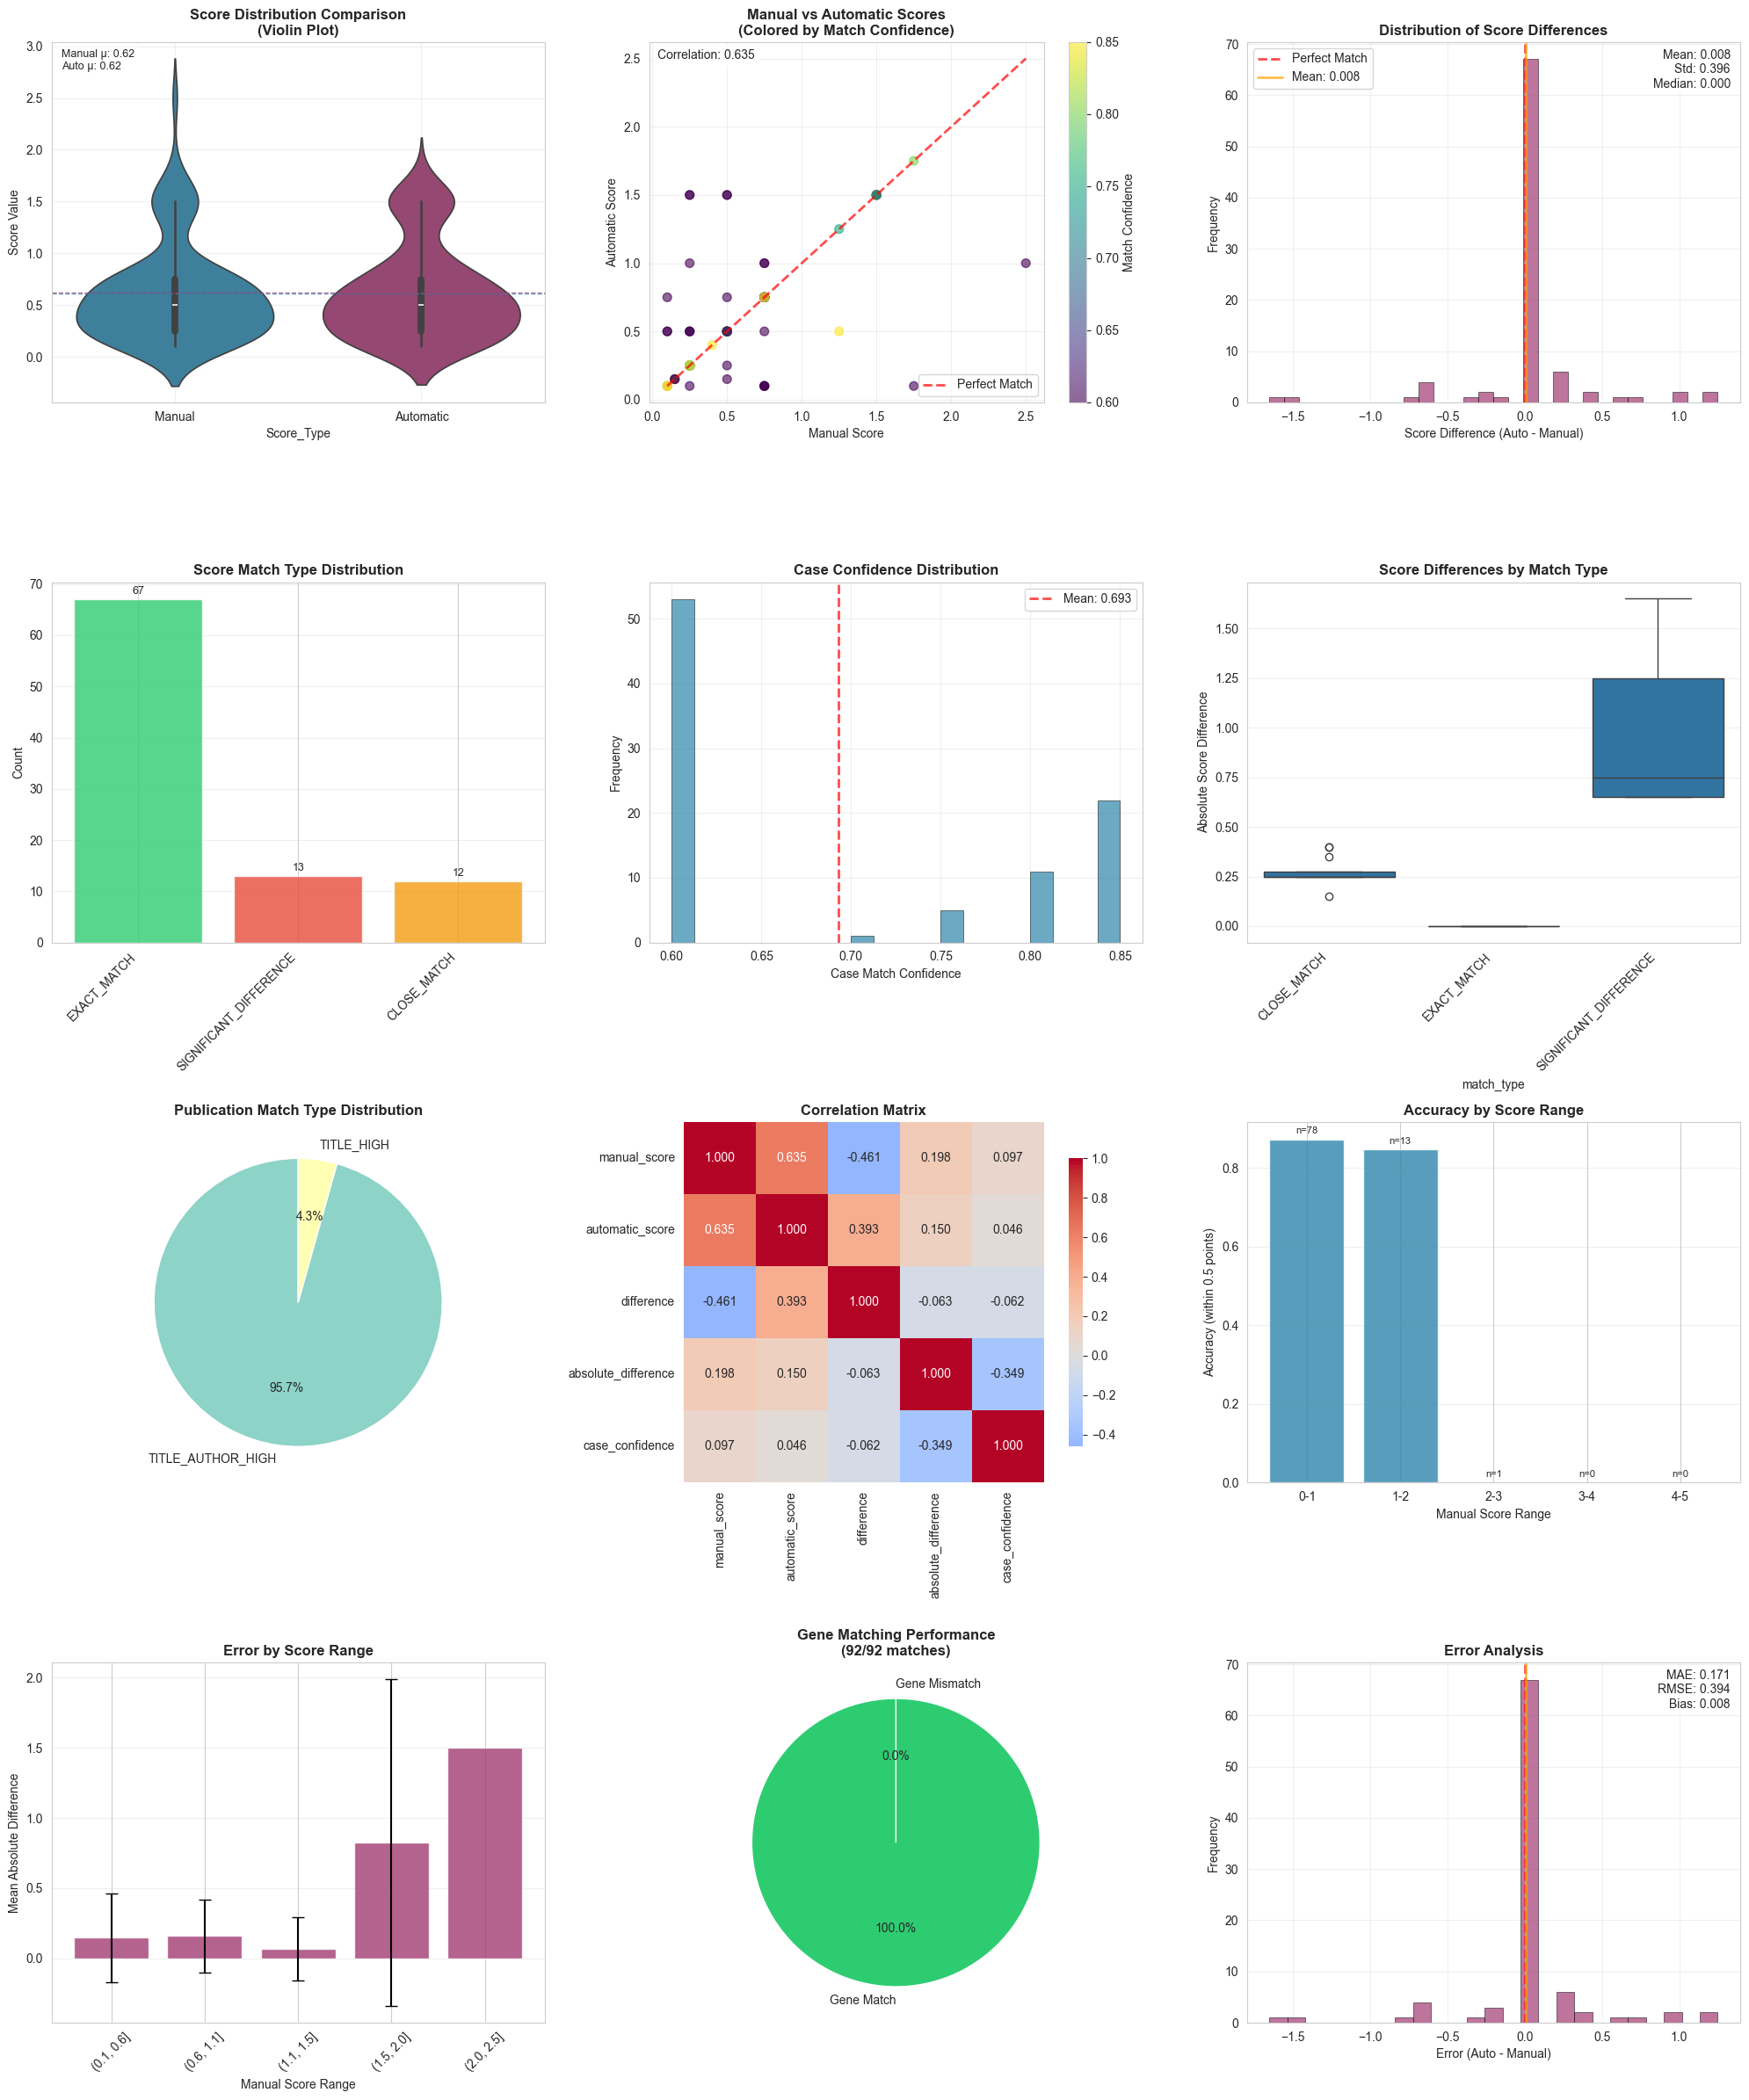

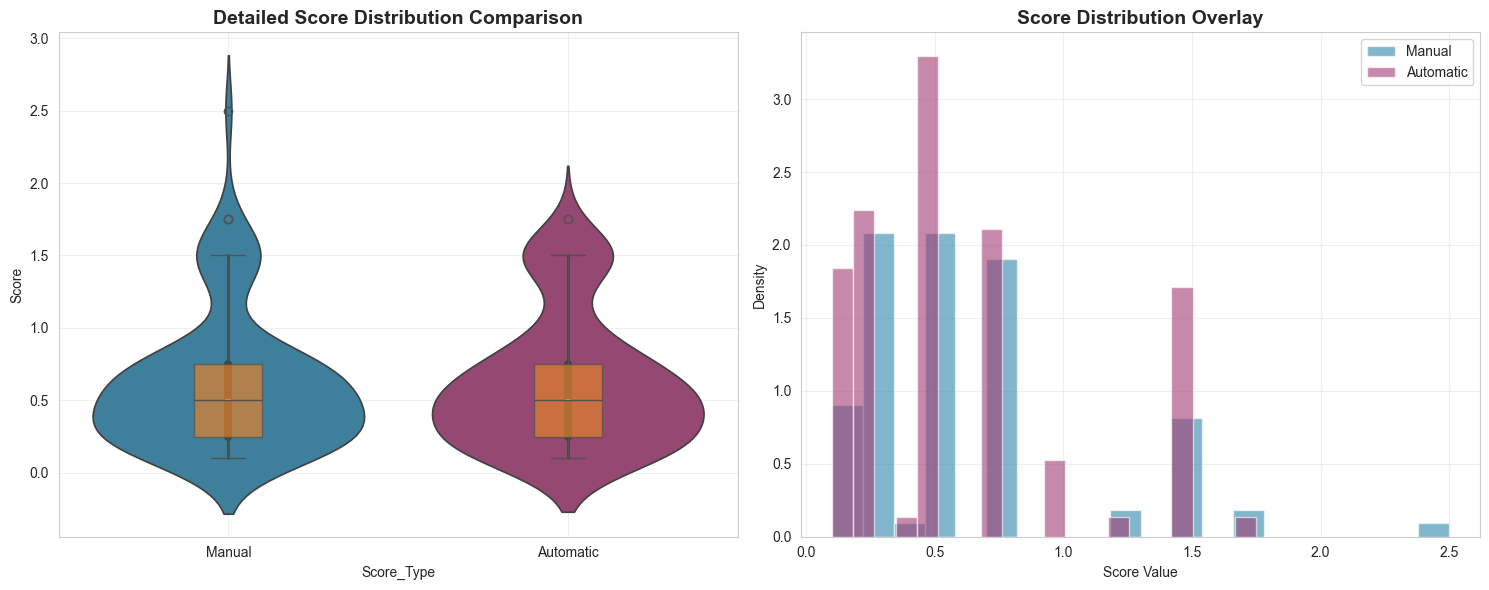

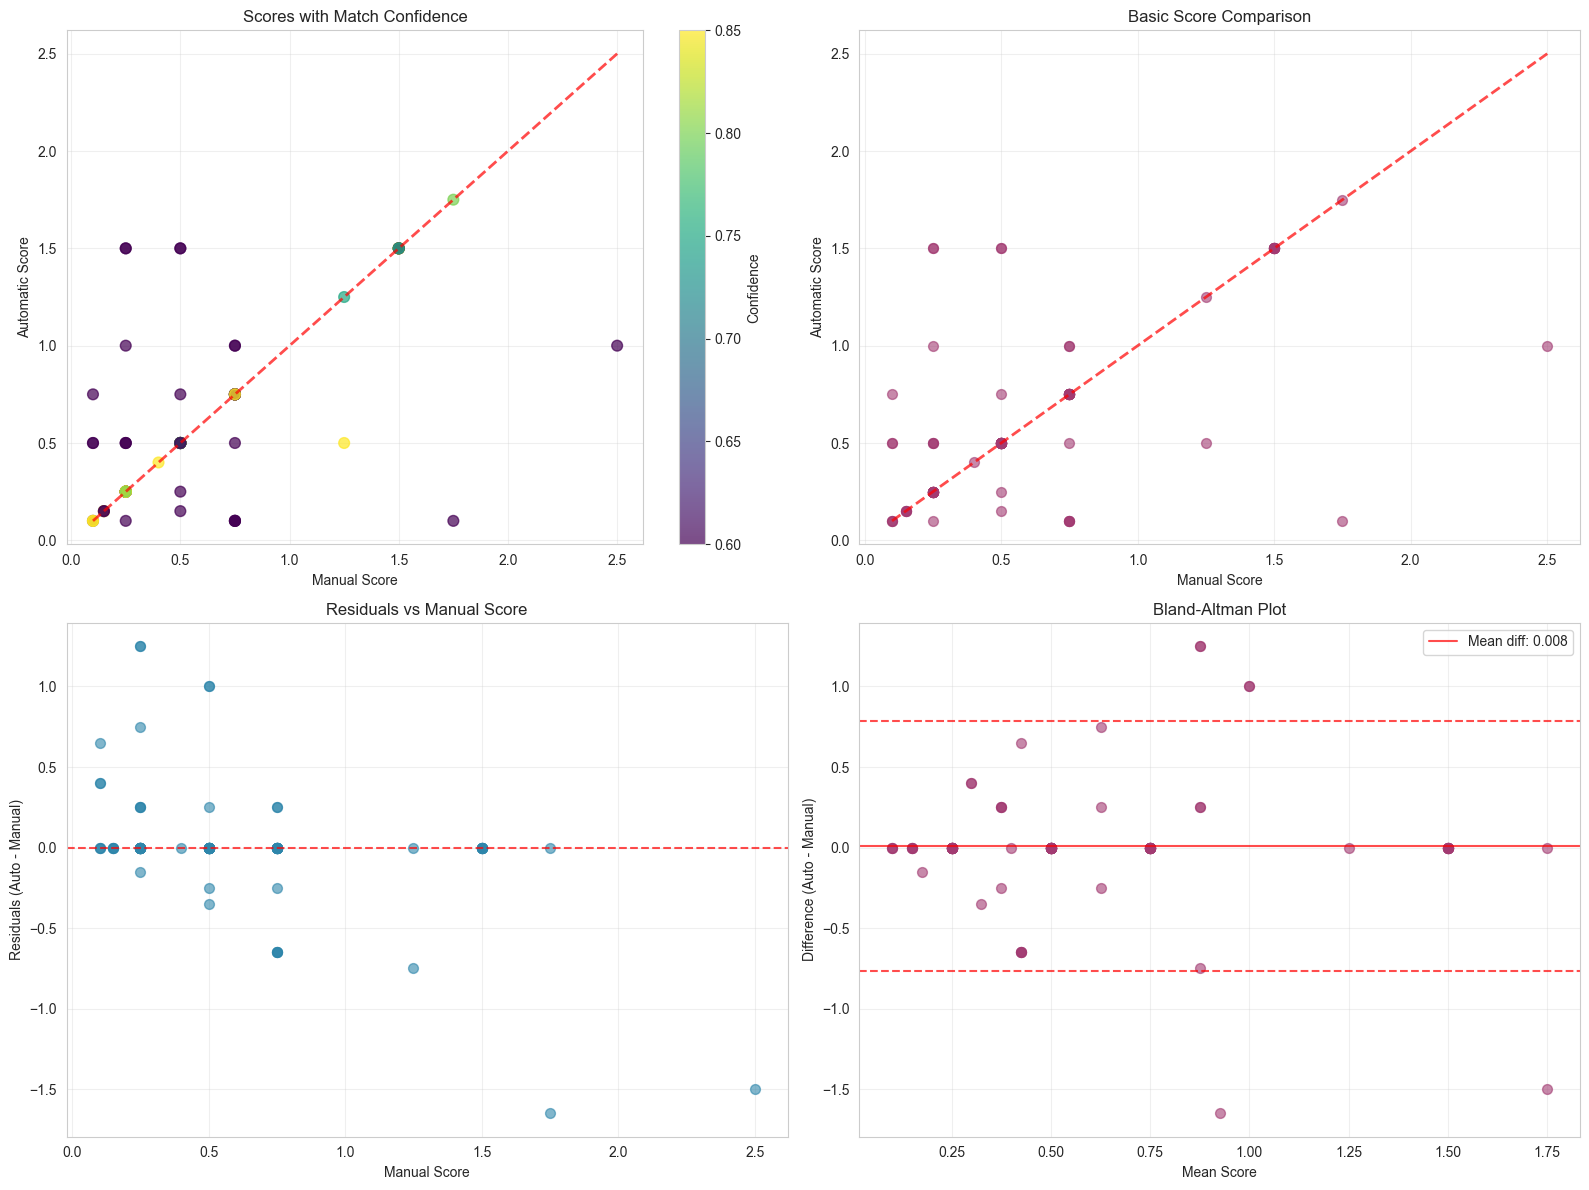

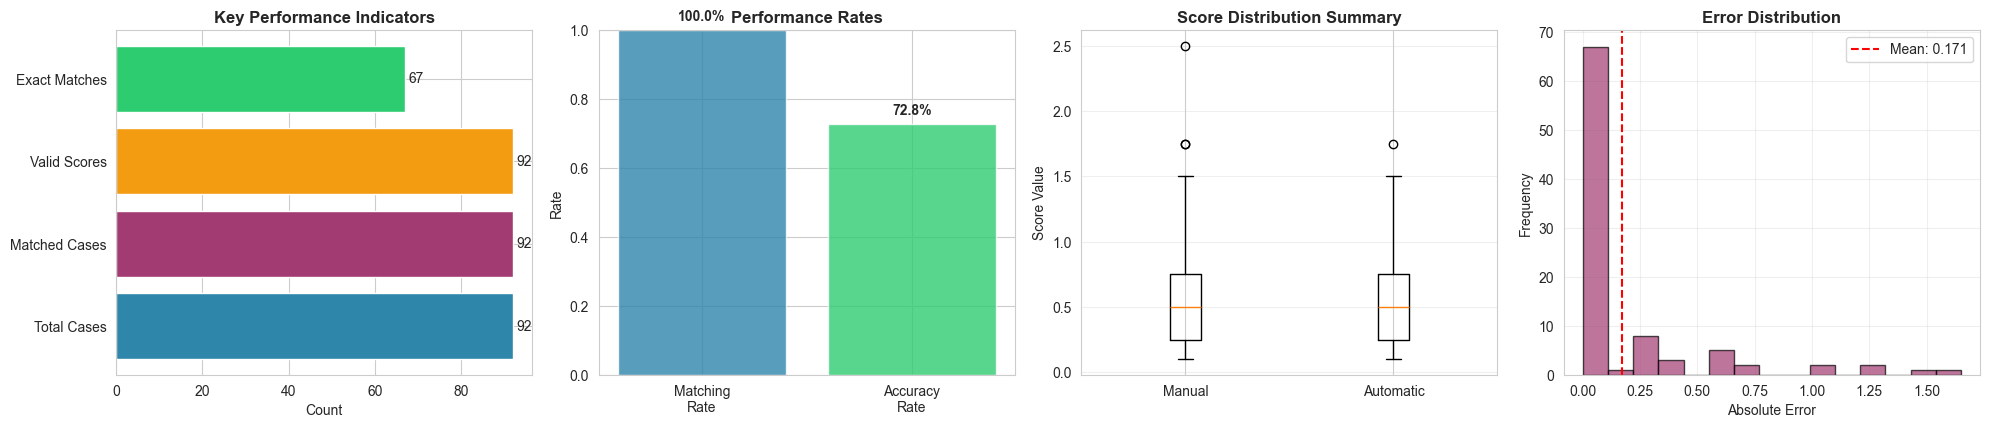


Visualization complete!


In [19]:
results = compare_manual_vs_automatic_scores_with_viz(manual_df=manual_df, auto_extractions=eagle_ai_extractions)

In [15]:
results.sample(5)

,publication_index,manual_dataset_publication,auto_extraction_dataset,case_index,manual_case_id,automatic_case_id,manual_gene,automatic_gene,manual_score,automatic_score,difference,absolute_difference,percentage_difference,scores_match,match_type,case_confidence,publication_match_type
23,23,"Psoni S, et al. (2010): Phenotypic and genotyp...","Psoni S, et al. - Phenotypic and Genotypic Var...",0,Patient 1,Patient 1,MECP2,MECP2,0.15,0.15,0.0,0.0,0.0,True,EXACT_MATCH,0.85,TITLE_AUTHOR_HIGH
10,9,"Geerdink N, et al. (2002): MECP2 mutation in a...","Geerdink N, et al. - MECP2 Mutation in a Boy w...",0,Affected sister in this pedigree,case_001,MECP2,MECP2,0.50,0.50,0.0,0.0,0.0,True,EXACT_MATCH,0.60,TITLE_AUTHOR_HIGH
17,17,"Gu Y, et al. (2020): Three intellectual disabi...","Gu Y, et al. - Three intellectual disability-a...",0,Case 2,case 2,MECP2,MECP2,0.40,0.40,0.0,0.0,0.0,True,EXACT_MATCH,0.85,TITLE_HIGH
2,2,"Piton A, et al. (2011): Systematic resequencin...","Piton A, et al. - Systematic resequencing of X...",0,NaN,case_003,MECP2,MECP2,0.25,0.25,0.0,0.0,0.0,True,EXACT_MATCH,0.60,TITLE_AUTHOR_HIGH
33,32,"Jiao J, et al. (2019): Identification of De No...","Jiao J, et al. - Identification of De Novo JAK...",0,Family A18 (ID: ND171202291),A18,CACNA1D,CACNA1D,0.50,0.50,0.0,0.0,0.0,True,EXACT_MATCH,0.75,TITLE_AUTHOR_HIGH


In [20]:
f1_scores = evaluate_f1_between_manual_and_automatic(
    manual_df=manual_df,
    auto_extractions=eagle_ai_extractions
)


F1 EVALUATION REPORT

Cases (manual vs automatic):
  - Precision: 0.911
  - Recall:    0.710
  - F1:        0.798  (TP=92, FP=9, FN=37)

Phenotype quality (High/Medium/Low):
  - Micro P: 0.718, R: 0.663, F1: 0.689
  - Macro F1: 0.700
    - High   P: 0.702, R: 0.892, F1: 0.786
    - Medium P: 0.685, R: 0.598, F1: 0.638
    - Low    P: 0.815, R: 0.579, F1: 0.677
